<a href="https://colab.research.google.com/github/FaatihFath/Praktikum---Machine-Learning/blob/main/Praktikum_3_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/Praktikum Machine Learning/Praktikum 3/"

In [3]:
# Import File CSV dengan Pandas
import pandas as pd

df = pd.read_csv(path + "Data/socr.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
# Mengecek Informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [6]:
# Menghitung statistik deskriptif pada kolom numerik dengan describe
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


Data Preprocessing

In [5]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)" : "Tinggi_CM",
                    "Weight(Pounds)" : "Berat_KG"})
    .assign(
            Tinggi_CM = lambda d: d["Tinggi_CM"] * 2.54,
            Berat_KG = lambda d: d["Berat_KG"] * 0.453592
          )
    .round({"Tinggi_CM" : 2, "Berat_KG" : 2})
).copy()

df1.head()

,Tinggi_CM,Berat_KG
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


Data training & Test

In [21]:
# membagi dataset untuk training & Test
from sklearn.model_selection import train_test_split

X = df1[["Tinggi_CM"]]
y = df1["Berat_KG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [22]:
# Training Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

In [23]:
#Evaluasi model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("koefisien (KG per CM):", model.coef_[0])
print("intersep(KG):", model.intercept_)
print("R2 (test):", r2)
print("MAE(KG):", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) # default Squared = True
rmse = np.sqrt(mse)
print("RMS (KG):", rmse)

koefisien (KG per CM): 0.5518217971118468
intersep(KG): -37.656882325081
R2 (test): 0.24989238901493693
MAE(KG): 3.6704108331736673
RMS (KG): 4.60900592355825


Persamaan regresi

In [24]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan : y = {slope:.3f} * x + {intercept:.3f}")


Persamaan : y = 0.552 * x + -37.657


Plot Regresi

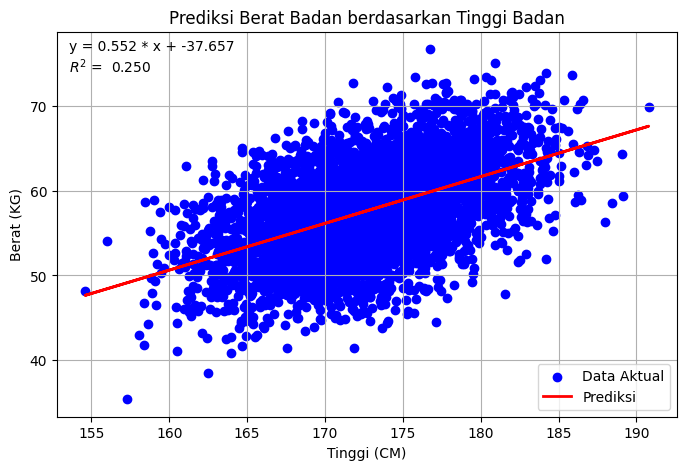

In [26]:
import matplotlib.pyplot as plt

#plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

#garis Regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (CM)")
plt.ylabel("Berat (KG)")
plt.title("Prediksi Berat Badan berdasarkan Tinggi Badan")
plt.text(0.02, 0.98, f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2 : .3f}", transform = plt.gca().transAxes, va="top")

plt.legend()
plt.grid(True)
plt.show()

In [29]:
y_pred_test = model.predict(X_test)

#buat label hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "tinggi (cm)":X_test["Tinggi_CM"].to_numpy(),
    "Berat Aktual (KG)" : y_test.to_numpy(),
    "Berat Prediksi (KG)" : y_pred_test,
})

#1 Selisih error (positif = overpredict)
hasil["selisih error (KG)"]  = hasil ["Berat Prediksi (KG)"] - hasil["Berat Aktual (KG)"]

#2 akurasi perbaris (100 * (1 - |error|aktual)), dibatasi 0-100
denom = hasil["Berat Aktual (KG)"].replace(0, np.nan) #antisipasi pembagian nol
hasil["akurasi (%)"] = (1 - (hasil["selisih error (KG)"].abs() / denom)).clip(lower=0, upper=1) * 100
hasil

,tinggi (cm),Berat Aktual (KG),Berat Prediksi (KG),selisih error (KG),akurasi (%)
0,174.73,50.16,58.762940,8.602940,82.849003
1,171.31,50.33,56.875710,6.545710,86.994417
2,169.29,58.22,55.761030,-2.458970,95.776417
3,163.30,58.92,52.455617,-6.464383,89.028542
4,170.52,63.06,56.439771,-6.620229,89.501698
...,...,...,...,...,...
4995,178.75,56.59,60.981264,4.391264,92.240212
4996,163.05,47.45,52.317662,4.867662,89.741493
4997,166.51,52.46,54.226965,1.766965,96.631786
4998,167.70,49.90,54.883633,4.983633,90.012759


In [3]:
import pandas as pd
df = pd.read_csv(path + "Data/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [6]:
# menghitung statistik deskriptif pada kolom numeric dengan describe.
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


Data Pre-Processing

In [8]:
df1 =(df[["Berat Badan (kg)","Jenis Kelamin","Umur (bulan)", "Tinggi Badan (cm)"]]
      .rename(columns={"Jenis Kelamin" : "jk", "Umur (bulan)" : "umur_bln",
                       "Tinggi Badan (cm)" : "tinggi_cm", "Berat Badan (kg)" : "berat_kg"}).copy())

# laki - laki:1, Perempuan : 0
df1["jk"] = df1["jk"].map({"Laki-laki" : 1, "Perempuan" : 0})
df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


Analisis Korelasi

In [9]:
# Menghitung Matriks Korelasi
corr_matrix = df1.corr()

print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


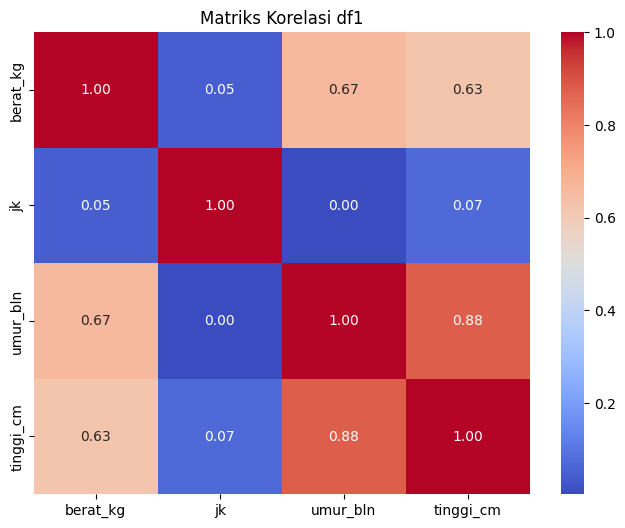

In [10]:
# Membuat Heatmap Grafik
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

Membagi dataset untuk training dan test

In [12]:
from sklearn.model_selection import train_test_split

#misalkan target (Y) adalah berat badan, # variabel dependen
y = df1["berat_kg"]

# fitur (X) adalah umur dan tinggi # variabel independen
X = df1[["umur_bln", "tinggi_cm"]]

# bagi data train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42) # random_State supaya hasil konsisten

#Cetak Pembagian data
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# cek konstanta pada data training
X_train.head()



Jumlah data train: 80000
Jumlah data test: 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


Pemodelan

In [15]:
# tambahkan konstanta
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [16]:
import statsmodels.api as sm

# buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print("---------")
print(model.params)
print("---------")
const = model.params["const"]
x1_umur = model.params["umur_bln"]
x2_tinggi = model.params["tinggi_cm"]

# print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")


---------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
---------
y = 2.546 + 0.230*x1 + 0.054*x2


Mencetak informasi model regresi OLS

In [17]:
# tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Thu, 09 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:05:04   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

Pengujian Model Data Testing

In [20]:
import numpy as np

# tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# prediksi berat badan
y_pred_test = model.predict(X_test_const)

# buat label hasil prediksi
hasil = pd.DataFrame({
    "Umur (bln)" : X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)" : X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)" : y_test.to_numpy(),
    "Berat Prediksi(kg)": y_pred_test
    })

# 1 selisih error (positif = overpredict)
hasil["selisih error (kg)"] = hasil["Berat Prediksi(kg)"] - hasil["Berat Aktual (kg)"]

# 2 akurasi perbaris (100* (|error|/aktual)), dibatasi(0-100)
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan) #antisipasi pembagian nol
hasil["akurasi (%)"] = (1 - (hasil["selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1)
hasil

,Umur (bln),Tinggi (cm),Berat Aktual (kg),Berat Prediksi(kg),selisih error (kg),akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,0.819175
80184,8,66.0,12.2,7.960047,-4.239953,0.652463
19864,20,90.0,10.9,12.017284,1.117284,0.897497
76699,13,82.4,9.6,9.997392,0.397392,0.958605
92991,11,70.1,13.2,8.871391,-4.328609,0.672075
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,0.700018
29313,15,80.2,9.6,10.337607,0.737607,0.923166
37862,8,61.9,8.0,7.737860,-0.262140,0.967232
53421,12,74.9,5.4,9.361232,3.961232,0.266438
